# Algerian Forest Fire Dataset-Temperature Prediction

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Suyash\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


# Drop Row

In [9]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [10]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


In [11]:
df.loc[:122,'region'] = 'bejaia'
df.loc[122:,'region'] ='sidi-bel abbes'

In [12]:
df.drop(columns=['region'],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [14]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [15]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

# Stripping the name of the Columns

In [16]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [17]:
df.drop('Classes',axis=1,inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


# Replacing the day,month,year feature with datetime feature

In [18]:
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05


In [20]:
df.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
date           datetime64[ns]
dtype: object

# Converting columns type into Numeric:

In [21]:
df['Temperature'] = df['Temperature'].astype(float)
df['RH']    = df['RH'].astype(float)
df['Ws']    = df['Ws'].astype(float)
df['Rain']  = df['Rain'].astype(float)
df['FFMC']  = df['FFMC'].astype(float)
df['DMC']   = df['DMC'].astype(float)
#df['DC']    = df['DC'].astype(float)
df['ISI']   = df['ISI'].astype(float)
df['BUI']   = df['BUI'].astype(float)
#df['FWI']   = df['FWI'].astype(float)

In [22]:
df.dtypes

Temperature           float64
RH                    float64
Ws                    float64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
date           datetime64[ns]
dtype: object

# What is label encoding?

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

# As in Drought code(DC) and Fire Wheather Index(FWI) are having a problem of string Formating,before converting them into float we will handle this issue

In [23]:
df.dtypes

Temperature           float64
RH                    float64
Ws                    float64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
date           datetime64[ns]
dtype: object

In [24]:
df['DC']= df['DC'].str.replace(" ","")

# In Drought code(DC) & Fire Wheather Index there was extra space which was giving issue

In [25]:
df['DC'] = df['DC'].astype(float)

In [26]:
df['FWI'] = df['FWI'].str.replace(" ","")

In [27]:
# FWI is filled by string fire by mistake
df[df['FWI']=='fire']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date
165,37.0,37.0,18.0,0.2,88.9,12.9,14.69,12.5,10.4,fire,2012-07-14


In [28]:
df = df.drop(labels=165,axis=0)

In [29]:
df['FWI'] = df['FWI'].astype(float)

In [30]:
df.dtypes

Temperature           float64
RH                    float64
Ws                    float64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
date           datetime64[ns]
dtype: object

In [31]:
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
date           0
dtype: int64

# Univariete Analysis

In [32]:
num_col = [fea for fea in df.columns if df[fea].dtypes!='o']

In [33]:
num_col

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'date']

In [34]:
from matplotlib import figure

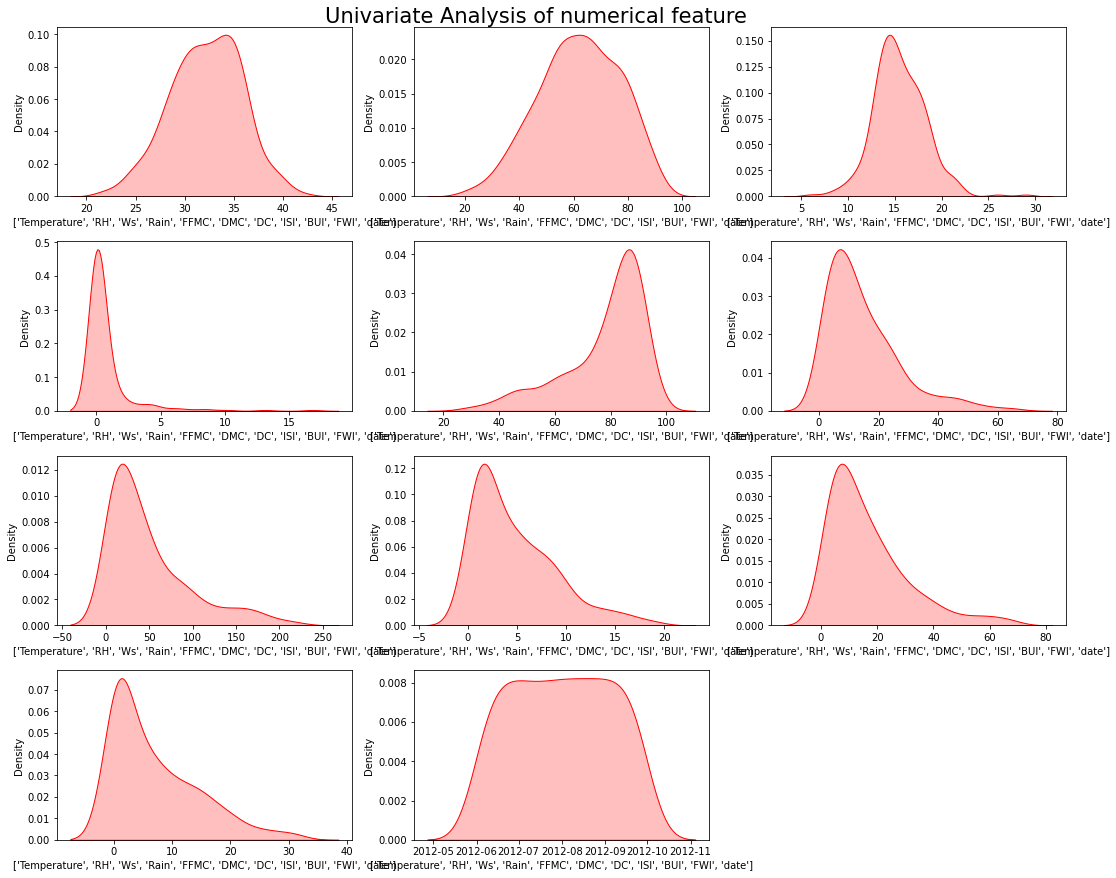

In [35]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of numerical feature',fontsize =21,fontweight=10)

for i in range(0,len(num_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True,color='r')
    plt.xlabel(num_col)
    plt.tight_layout()

# Visualization of target feature

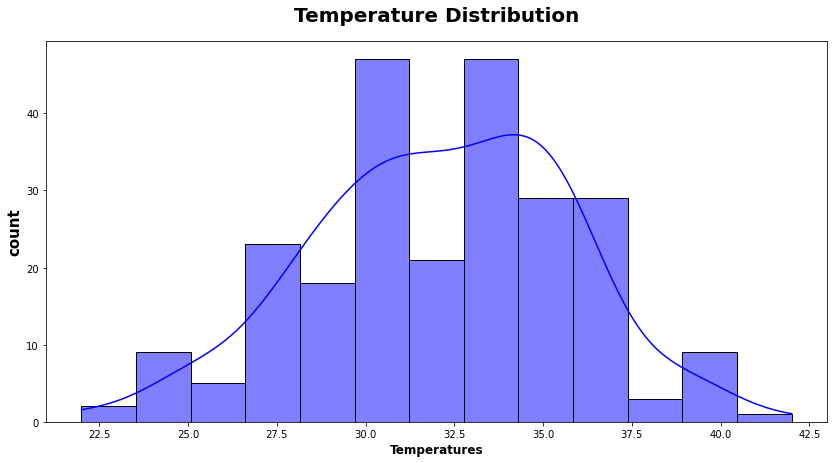

In [36]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec='black', color='blue', kde=True)
plt.title("Temperature Distribution",weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=15)
plt.xlabel("Temperatures",weight="bold",fontsize=12)
plt.show()

Temperature occurs most of time in range of 32.5 to 35.0

# Temperature Vs Rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

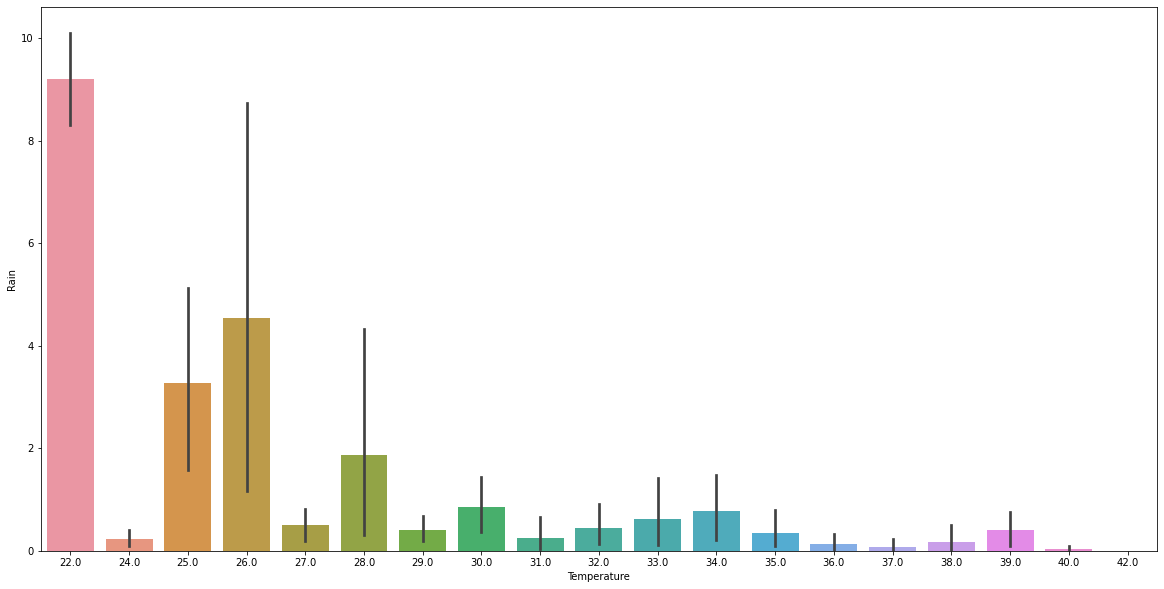

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x='Temperature',y='Rain',data=df)

Rain occurs most of the time at 22 degree celcius

# Correlation of the features

In [38]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


# Multivariate Analysis

<AxesSubplot:>

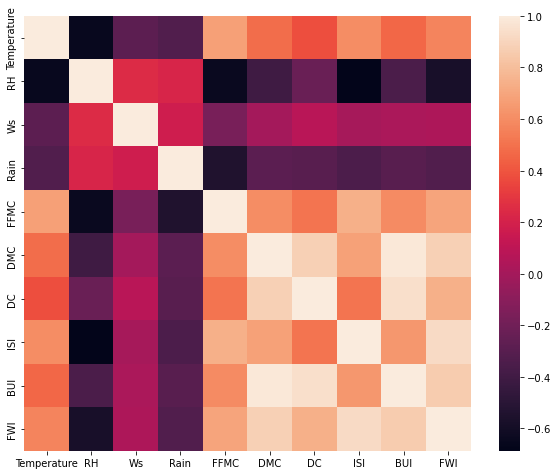

In [39]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

# Temperature Vs date feature

<AxesSubplot:xlabel='Temperature', ylabel='date'>

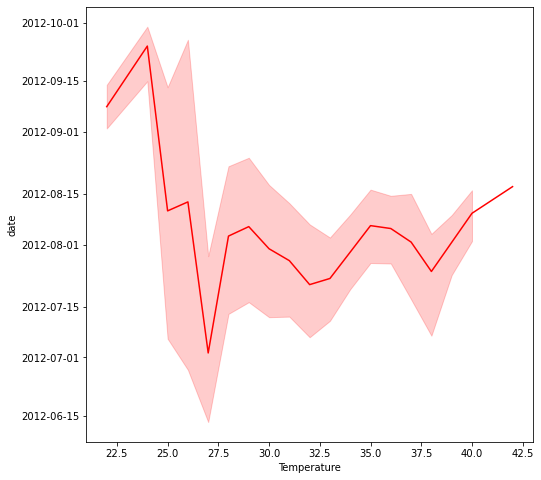

In [40]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Temperature',y='date',data=df,color='r')

# Temperature Vs FFMC

<Figure size 720x720 with 0 Axes>

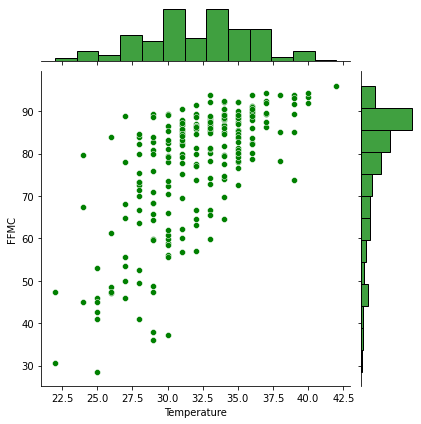

In [41]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Temperature',y='FFMC',data=df,color='g')

# Tempeature Vs ISI

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

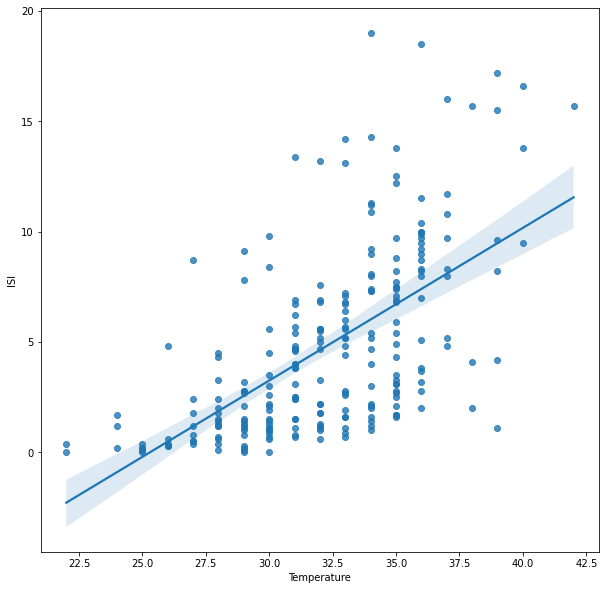

In [42]:
plt.figure(figsize=(10,10))
sns.regplot(x='Temperature',y='ISI',data=df)

# Checking the outliers of the target Temperature feature

<AxesSubplot:xlabel='Temperature'>

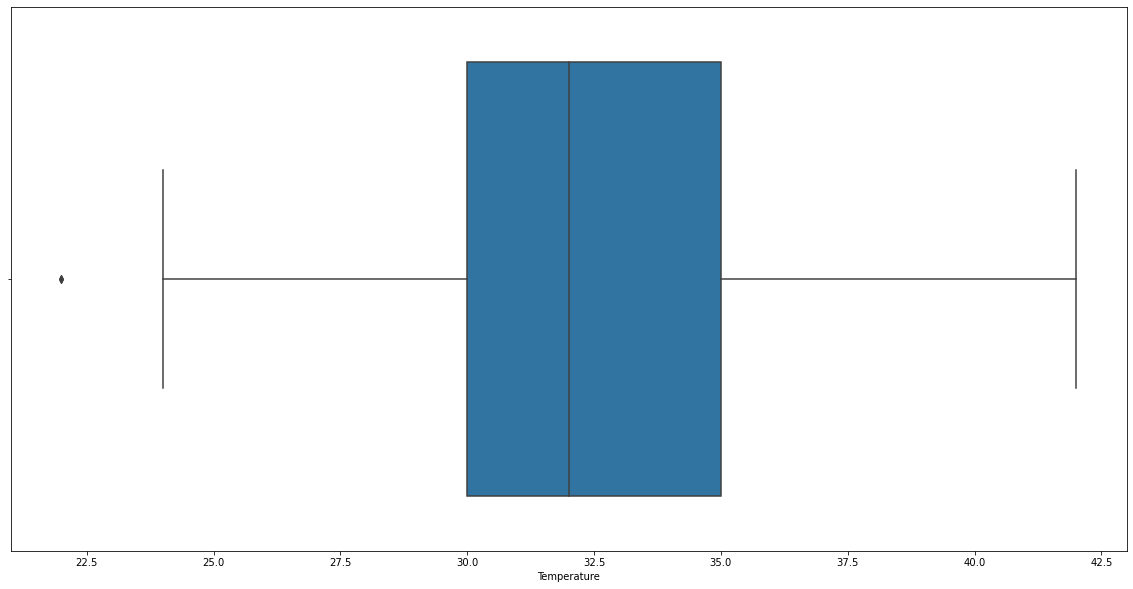

In [43]:
sns.boxplot(df['Temperature'])

# Boxplot of Rain Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

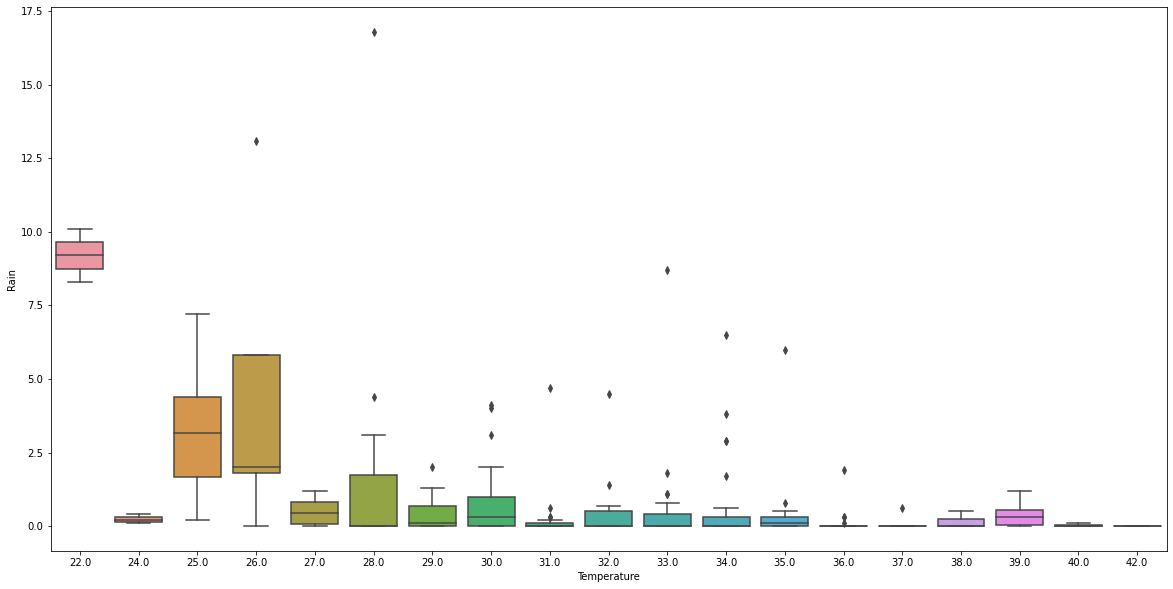

In [44]:
sns.boxplot(x='Temperature',y='Rain',data=df)

# boxplot of FFMC Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

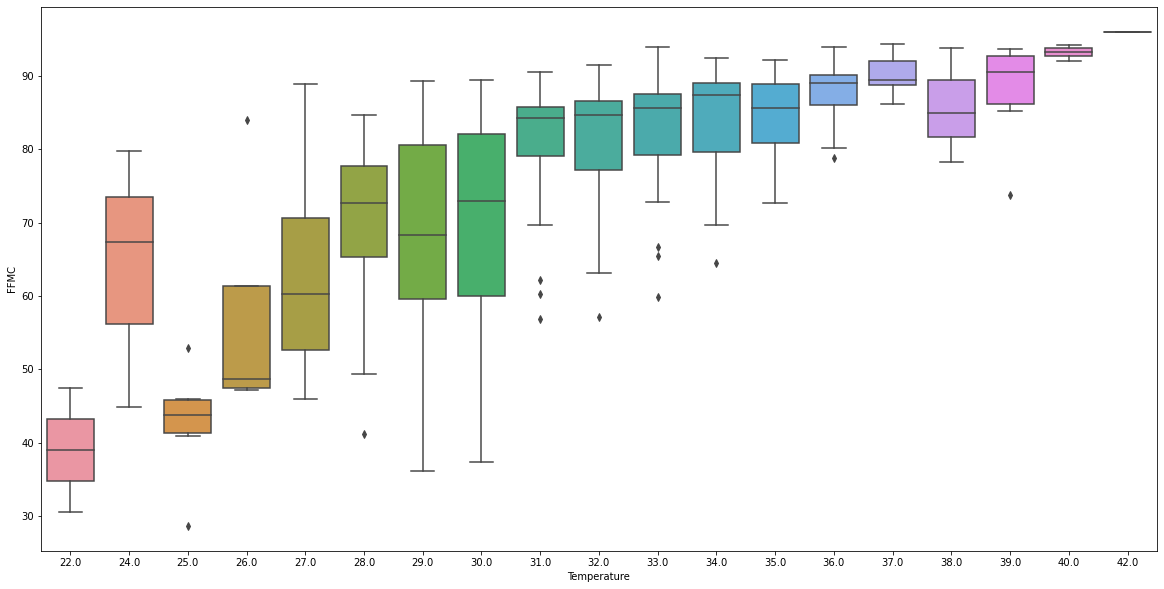

In [45]:
sns.boxplot(x='Temperature',y='FFMC',data=df)

# Boxplot of ISI vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

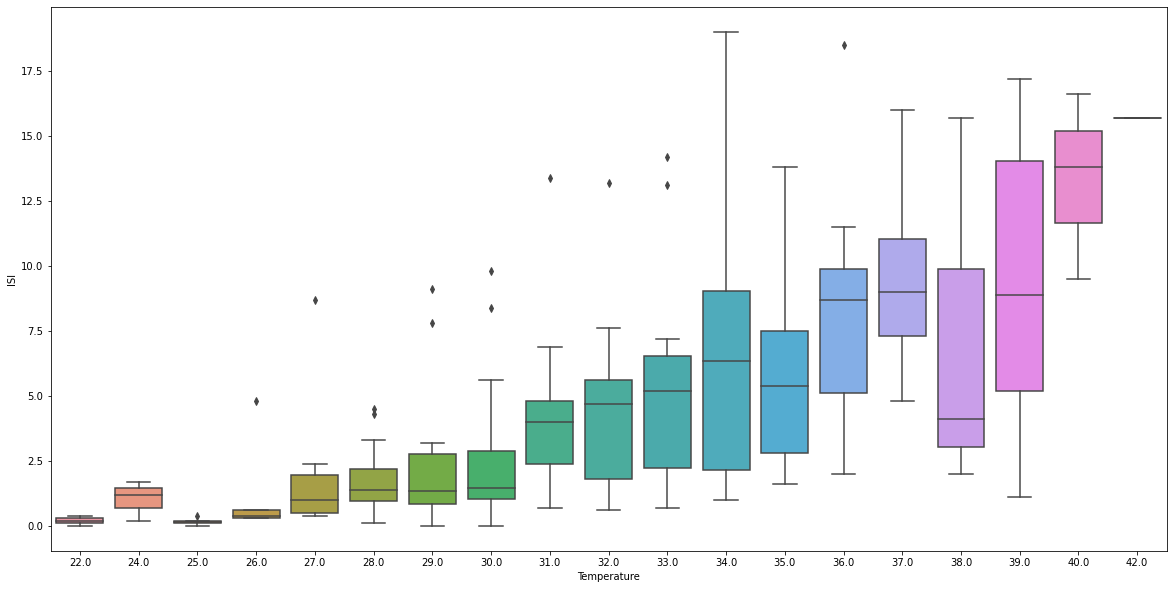

In [46]:
sns.boxplot(x='Temperature',y='ISI',data=df)

# Boxplot of BUI Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

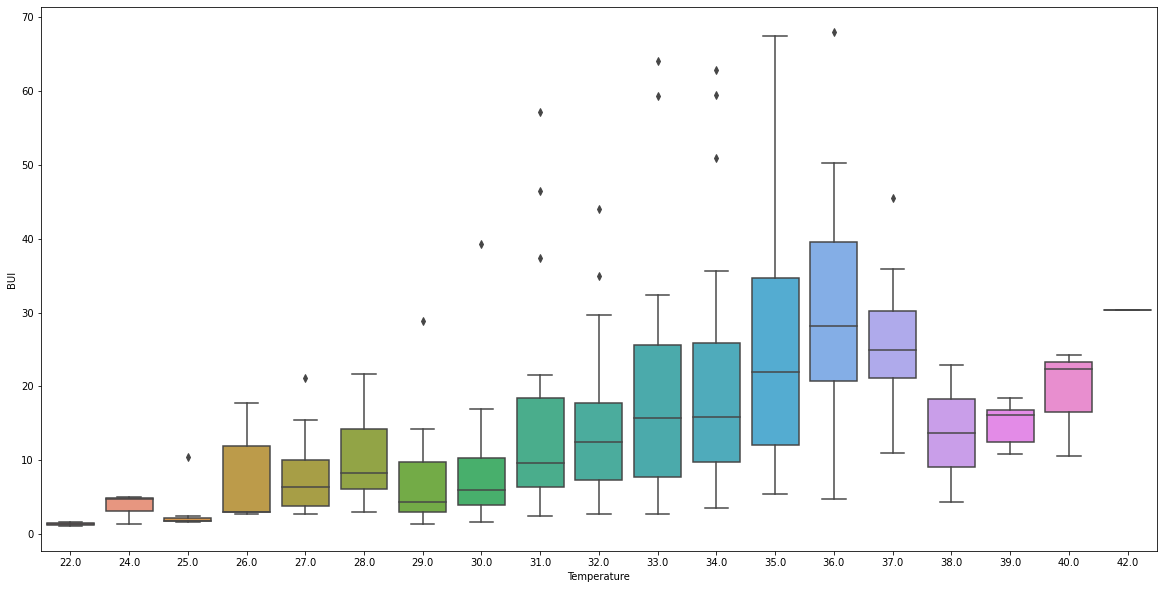

In [47]:
sns.boxplot(x='Temperature',y='BUI',data=df)

# Boxplot of FFMC Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

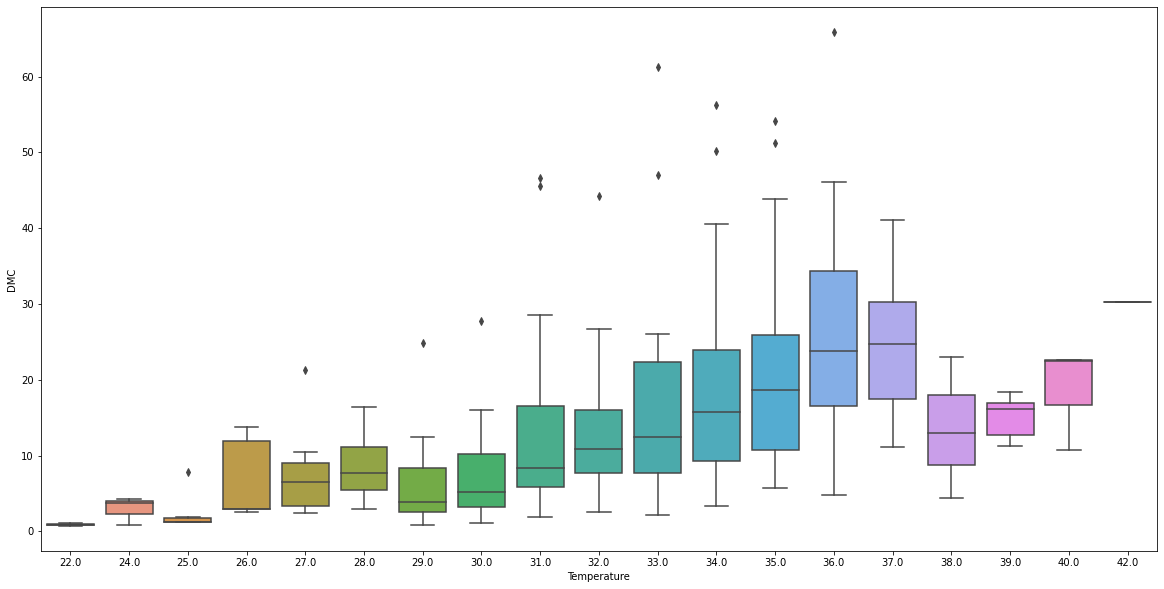

In [48]:
sns.boxplot(x="Temperature",y='DMC',data=df)

# Creating Dependent and Independent Feature

In [49]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'date'],
      dtype='object')

In [50]:
##Independent feature
x=pd.DataFrame(df,columns=['RH','Ws','Rain','FFMC','DMC','ISI','BUI','FWI'])

##Dependent feature
y=pd.DataFrame(df,columns=['Temperature'])

# Independent Feature

In [51]:
x

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI
0,57.0,18.0,0.0,65.7,3.4,1.3,3.4,0.5
1,61.0,13.0,1.3,64.4,4.1,1.0,3.9,0.4
2,82.0,22.0,13.1,47.1,2.5,0.3,2.7,0.1
3,89.0,13.0,2.5,28.6,1.3,0.0,1.7,0.0
4,77.0,16.0,0.0,64.8,3.0,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...
239,65.0,14.0,0.0,85.4,16.0,4.5,16.9,6.5
240,87.0,15.0,4.4,41.1,6.5,0.1,6.2,0.0
241,87.0,29.0,0.5,45.9,3.5,0.4,3.4,0.2
242,54.0,18.0,0.1,79.7,4.3,1.7,5.1,0.7


# Dependent Feature

In [52]:
y

,Temperature
0,29.0
1,29.0
2,26.0
3,25.0
4,27.0
...,...
239,30.0
240,28.0
241,27.0
242,24.0


# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.33,random_state=10)

In [55]:
x_train.shape

(162, 8)

In [56]:
x_test.shape

(81, 8)

In [57]:
y_train.shape

(162, 1)

In [58]:
y_test.shape

(81, 1)

# Independent Training dataset

In [59]:
x_train

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI
25,64.0,18.0,0.0,86.8,17.8,6.7,21.6,10.6
121,78.0,14.0,1.4,45.0,1.9,0.2,2.4,0.1
174,71.0,17.0,0.0,87.3,46.6,6.9,46.5,16.3
72,51.0,13.0,0.3,81.3,15.6,2.5,20.7,4.2
186,35.0,15.0,0.0,93.8,23.0,15.7,22.9,20.9
...,...,...,...,...,...,...,...,...
64,69.0,13.0,0.0,85.0,8.2,4.0,8.2,3.9
15,89.0,13.0,0.7,36.1,1.7,0.0,2.2,0.0
229,26.0,13.0,0.0,93.9,21.2,14.2,22.4,19.3
125,64.0,14.0,0.0,79.4,5.2,2.2,5.6,1.0


# Independent Test Dataset

In [60]:
x_test

,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI
46,70.0,14.0,0.0,82.8,9.4,3.2,11.1,3.6
226,49.0,19.0,0.0,88.6,11.5,9.1,12.4,10.3
181,56.0,16.0,0.0,88.9,23.8,8.2,23.8,13.2
116,81.0,21.0,5.8,48.6,3.0,0.4,3.0,0.1
124,80.0,14.0,2.0,48.7,2.2,0.3,2.6,0.1
...,...,...,...,...,...,...,...,...
127,54.0,11.0,0.1,83.7,8.4,3.1,9.3,3.1
242,54.0,18.0,0.1,79.7,4.3,1.7,5.1,0.7
208,37.0,16.0,0.0,92.2,61.3,13.1,64.0,30.3
102,77.0,21.0,1.8,58.5,1.9,1.1,2.4,0.3


# Dependent Taining Dataset

In [61]:
y_train

,Temperature
25,31.0
121,25.0
174,31.0
72,35.0
186,38.0
...,...
64,34.0
15,29.0
229,33.0
125,30.0


# Dependent Test Dataset

In [62]:
y_test

,Temperature
46,29.0
226,29.0
181,36.0
116,26.0
124,29.0
...,...
127,35.0
242,24.0
208,33.0
102,30.0


# standardizing or feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [64]:
scaler

StandardScaler()

In [65]:
x_train = scaler.fit_transform(x_train) #In feature scaling the dtype should be numeric

In [66]:
x_test = scaler.transform(x_test)

In [67]:
x_train

array([[ 0.06835876,  0.89673457, -0.42406458, ...,  0.48086219,
         0.38986031,  0.52024214],
       [ 0.99672801, -0.58185068,  0.40434065, ..., -1.07139989,
        -1.0010797 , -0.93452011],
       [ 0.53254338,  0.52708826, -0.42406458, ...,  0.5286241 ,
         2.19373563,  1.30997022],
       ...,
       [-2.45150064, -0.95149699, -0.42406458, ...,  2.27193383,
         0.44781614,  1.72561657],
       [ 0.06835876, -0.58185068, -0.42406458, ..., -0.59378078,
        -0.76925637, -0.8098262 ],
       [ 1.0630401 , -1.3211433 , -0.42406458, ..., -0.80870938,
        -0.26214282, -0.82368108]])

In [68]:
x_test

array([[ 4.66231295e-01, -5.81850675e-01, -4.24064583e-01,
         3.74594357e-01, -4.06694465e-01, -3.54971234e-01,
        -3.70810009e-01, -4.49599362e-01],
       [-9.26322582e-01,  1.26638088e+00, -4.24064583e-01,
         7.58044470e-01, -2.28559462e-01,  1.05400512e+00,
        -2.76631780e-01,  4.78677502e-01],
       [-4.62137956e-01,  1.57441947e-01, -4.24064583e-01,
         7.77878096e-01,  8.14802699e-01,  8.39076521e-01,
         5.49238849e-01,  8.80468981e-01],
       [ 1.19566428e+00,  2.00567350e+00,  3.00789995e+00,
        -1.88643906e+00, -9.49582093e-01, -1.02363798e+00,
        -9.57612824e-01, -9.34520112e-01],
       [ 1.12935219e+00, -5.81850675e-01,  7.59371462e-01,
        -1.87982786e+00, -1.01744305e+00, -1.04751893e+00,
        -9.86590741e-01, -9.34520112e-01],
       [-3.29513777e-01,  1.57441947e-01, -4.24064583e-01,
         7.24988426e-01,  1.15410747e+00,  6.24147925e-01,
         8.31773537e-01,  8.52759223e-01],
       [-1.96889599e-01,  8.967345

# Model selection

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regression=LinearRegression()

In [71]:
regression

LinearRegression()

In [72]:
regression.fit(x_train,y_train)

LinearRegression()

# coefficient

In [73]:
print(regression.coef_)

[[-1.49942033 -0.72669584 -0.24094423  0.94580058  0.02696882  0.30031924
   0.70429477 -0.51317749]]


# Intercept

In [74]:
print(regression.intercept_)

[32.07407407]


# Prediction of Test Data

In [75]:
reg_pred = regression.predict(x_test)

In [76]:
reg_pred

array([[32.1062853 ],
       [33.23177927],
       [33.69944846],
       [25.78693054],
       [28.28531512],
       [33.60837717],
       [31.78370976],
       [34.62963791],
       [31.79592244],
       [33.82887089],
       [34.11693283],
       [33.08438278],
       [35.62541063],
       [32.09372622],
       [33.57826754],
       [33.50750056],
       [27.71731131],
       [35.84800816],
       [32.87180531],
       [24.84552394],
       [31.98688456],
       [32.52194611],
       [33.15725573],
       [33.38826934],
       [30.10390158],
       [32.81682972],
       [34.28009726],
       [31.73596054],
       [32.16915436],
       [34.80134786],
       [34.26791669],
       [33.6965114 ],
       [34.14852005],
       [32.89446543],
       [31.1128983 ],
       [28.82226101],
       [32.48582391],
       [31.86530654],
       [33.18019393],
       [34.11075249],
       [34.24714756],
       [35.16268187],
       [34.28366537],
       [37.42159298],
       [32.85851957],
       [36

<AxesSubplot:ylabel='Density'>

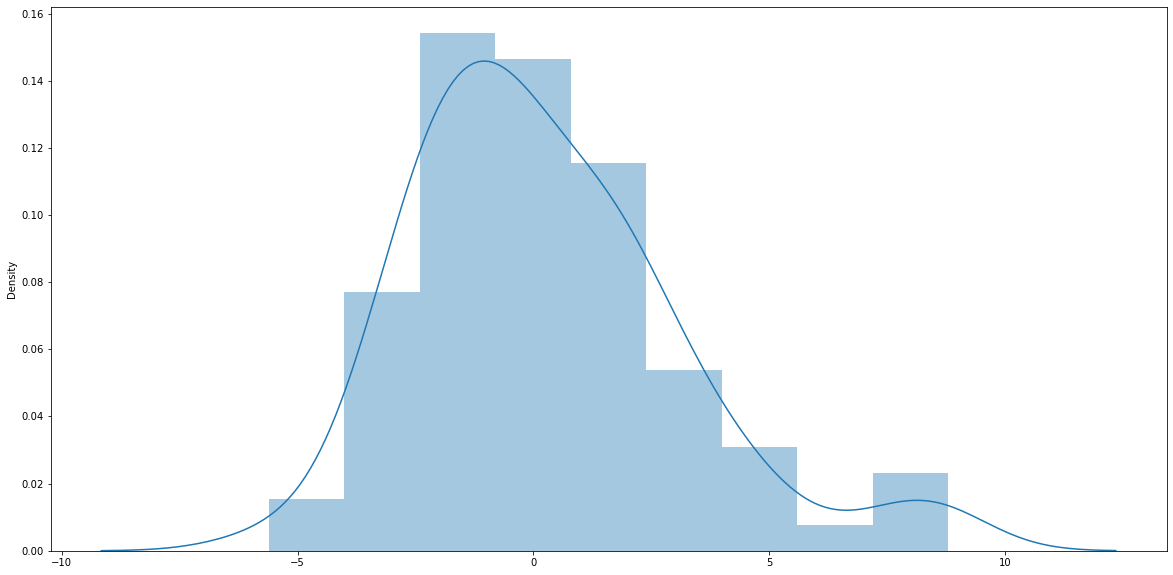

In [77]:
sns.distplot(reg_pred-y_test)

# Assumption Of Linear Regression

Text(0, 0.5, 'Test Predicted data')

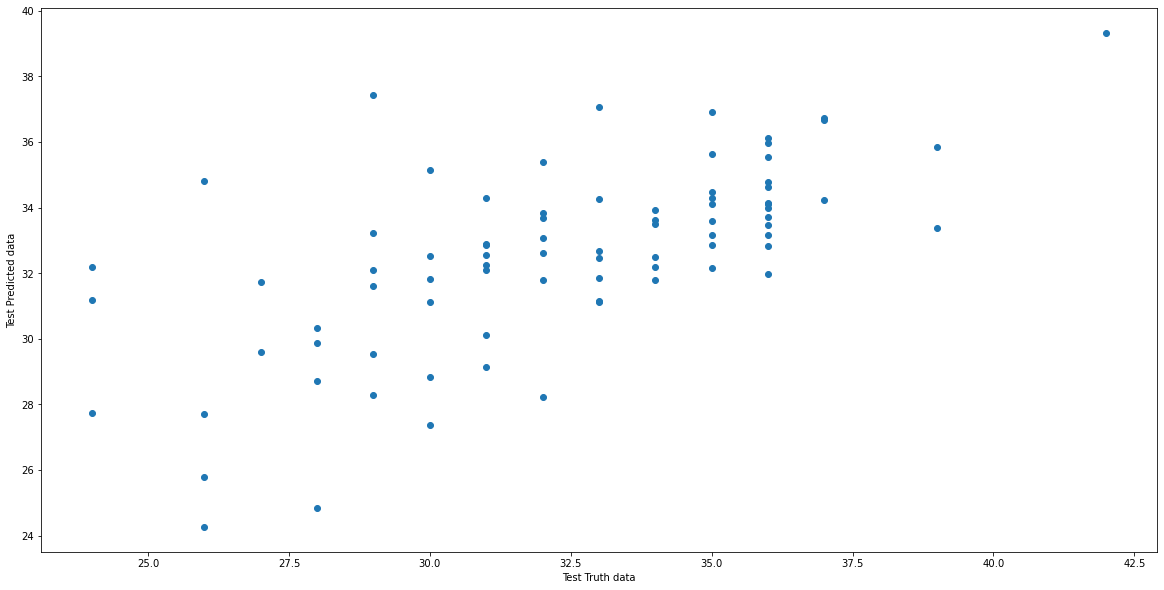

In [78]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Test Truth data')
plt.ylabel('Test Predicted data')

# Residuals

In [79]:
residual = y_test-reg_pred

In [80]:
residual

,Temperature
46,-3.106285
226,-4.231779
181,2.300552
116,0.213069
124,0.714685
...,...
127,0.520709
242,-8.195392
208,-4.067461
102,2.623177


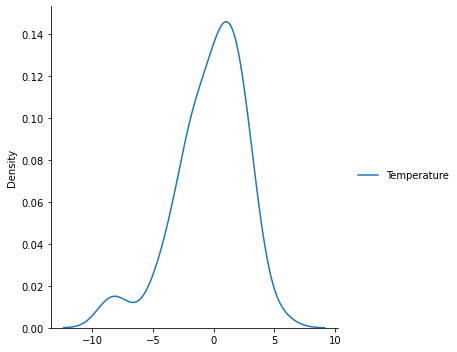

In [81]:
sns.displot(residual,kind='kde')

# scatter plot Prediction

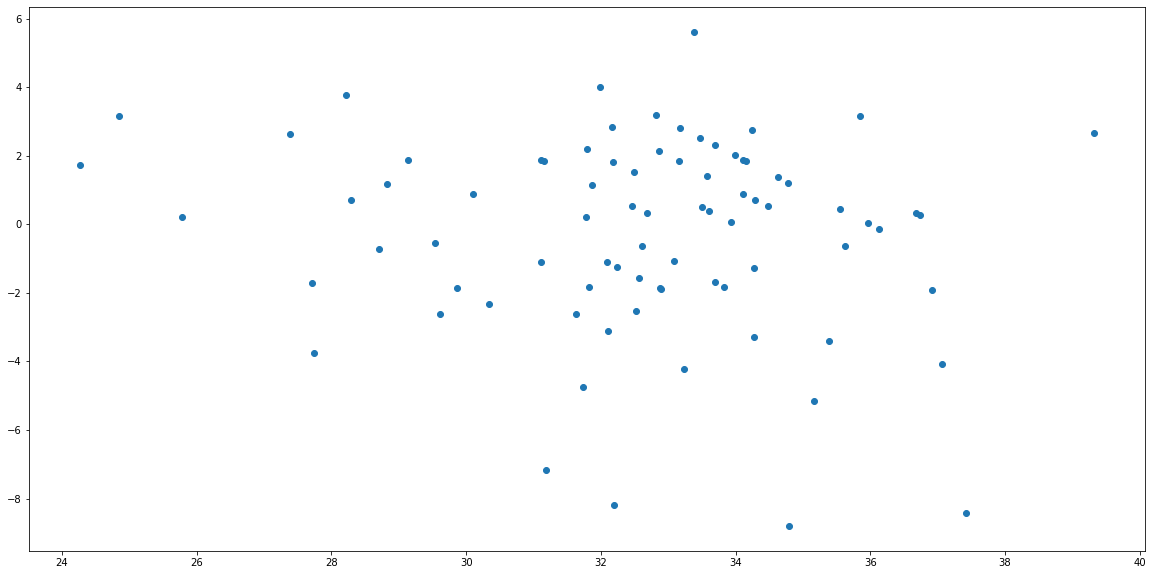

In [82]:
plt.scatter(reg_pred,residual)

# Performance Metrics

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

8.097669858203009
2.1776484895634596
2.8456405005205787


# R Square & Adjusted R Square

In [84]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.4150355419308779


# Adjusted R2

In [85]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.35003949103430876

Model is perfect

# Ridge Regression

In [86]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [87]:
ridge.fit(x_train,y_train)

Ridge()

In [88]:
ridge

Ridge()

In [89]:
#cofficient
print(ridge.coef_)

[[-1.47824589 -0.72459482 -0.24303841  0.9564332   0.12126801  0.21683467
   0.54347245 -0.37498665]]


In [90]:
#intercept
print(ridge.intercept_)

[32.07407407]


In [91]:
rid_pred = ridge.predict(x_test)

In [92]:
rid_pred

array([[32.10859366],
       [33.22486495],
       [33.73928087],
       [25.81088169],
       [28.30745958],
       [33.65112773],
       [31.75174162],
       [34.68299483],
       [31.82608098],
       [33.80220883],
       [34.09385207],
       [33.08892135],
       [35.61415021],
       [32.06367568],
       [33.47379291],
       [33.518371  ],
       [27.74128207],
       [35.82768176],
       [32.86066944],
       [24.84086909],
       [31.93959342],
       [32.49336066],
       [33.14574922],
       [33.37170249],
       [30.09705796],
       [32.84521954],
       [34.26451741],
       [31.73132631],
       [32.16884764],
       [34.75161019],
       [34.26223615],
       [33.69413974],
       [34.12588135],
       [32.88843661],
       [31.03804604],
       [28.82999779],
       [32.46287475],
       [31.8570415 ],
       [33.16791663],
       [34.08514481],
       [34.29154409],
       [35.15644513],
       [34.28639742],
       [37.34403412],
       [32.86177016],
       [36

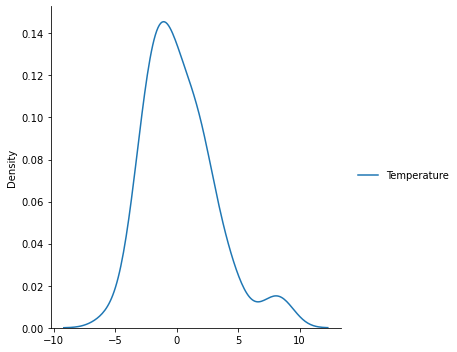

In [93]:
import seaborn as sns
sns.displot(rid_pred-y_test,kind='kde')

# Assumption on Ridge Regression

Text(0, 0.5, 'Test Predicted data')

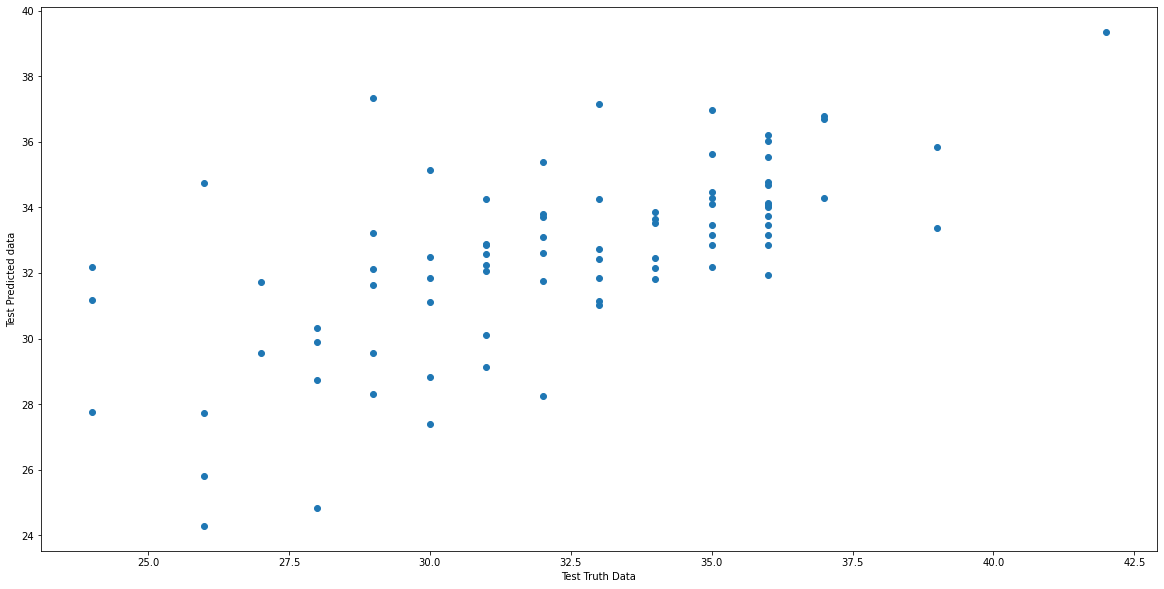

In [94]:
plt.scatter(y_test,rid_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted data")

# Rsidual

In [95]:
residual = y_test-rid_pred

In [96]:
residual

,Temperature
46,-3.108594
226,-4.224865
181,2.260719
116,0.189118
124,0.692540
...,...
127,0.537295
242,-8.179529
208,-4.144248
102,2.604862


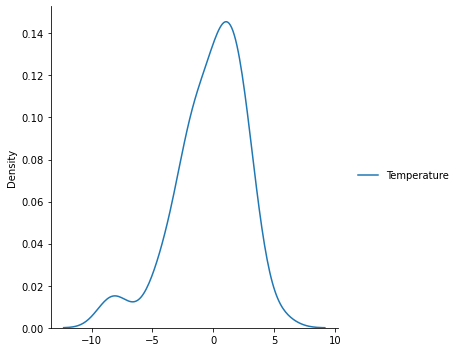

In [97]:
sns.displot(residual,kind='kde')

# Performance Matrix

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

8.074673439626329
2.1776037373320616
2.8415969875452656


# R Square

In [99]:
from sklearn.metrics import r2_score
score=r2_score(y_test,rid_pred)
print(score)

0.41669677136672745


# Adujusted R Square

In [100]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.351885301518586

# Lasso Regression

In [102]:
from sklearn.linear_model import Lasso

In [112]:
lasso=Lasso()

In [113]:
lasso

Lasso()

In [114]:
lasso.fit(x_train,y_train)

Lasso()

# Cofficient & Intercept

In [115]:
print(lasso.coef_)

[-0.88423537 -0.         -0.          0.88313134  0.          0.
  0.          0.        ]


In [116]:
print(lasso.intercept_)

[32.07407407]


# Predict Test Data

In [117]:
lasso_pred = lasso.predict(x_test)

In [118]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

# Performance Matrix

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

8.074673439626329
2.1776037373320616
2.8415969875452656


# R Square

In [121]:
from sklearn.metrics import r2_score

In [124]:
lasso_score=r2_score(y_test,lasso_pred)
print(score)

0.3719123543887275


# Adjusted R Square

In [126]:
1-(1-lasso_score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)

0.2934013986873185

# Elastic Net Regression

In [128]:
from sklearn.linear_model import ElasticNet

In [130]:
elastic=ElasticNet()

In [131]:
elastic

ElasticNet()

In [132]:
elastic.fit(x_train,y_train)

ElasticNet()

# Coefficient & Intercept

In [134]:
print(elastic.coef_)

[-0.77155493 -0.27327033 -0.02945645  0.70980198  0.11177449  0.20914599
  0.04593431  0.12829249]


In [136]:
print(elastic.intercept_)

[32.07407407]


# Predict Test Data

In [137]:
elastic_pred = elastic.predict(x_test)

In [138]:
elastic_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

# Performance Matric

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,rid_pred))
print(mean_absolute_error(y_test,rid_pred))
print(np.sqrt(mean_squared_error(y_test,rid_pred)))

8.074673439626329
2.1776037373320616
2.8415969875452656


# R Square

In [141]:
from sklearn.metrics import r2_score
elas_score = r2_score(y_test,elastic_pred)
print(elas_score)

0.4279953257782334


# Adjusted R Square

In [143]:
1-(1-elas_score)*(len(y_test))/(len(y_test)-x_test.shape[1]-1)

0.35649474150051264